In [1]:
import torch
from torch import nn
from torchvision.datasets import MNIST
import torchvision.transforms as T
from torch.utils.data import Dataset, DataLoader

In [2]:
transform = T.Compose([T.ToTensor(), T.Resize((32,32))])
train_set = MNIST('.MNSIT', transform=transform, train = True, download = True)
test_set = MNIST('.MNSIT', transform=transform, train = False, download = True)

In [3]:
train_loader = DataLoader(train_set, batch_size = 64, shuffle = True)
test_loader = DataLoader(test_set, batch_size = 64, shuffle = False)

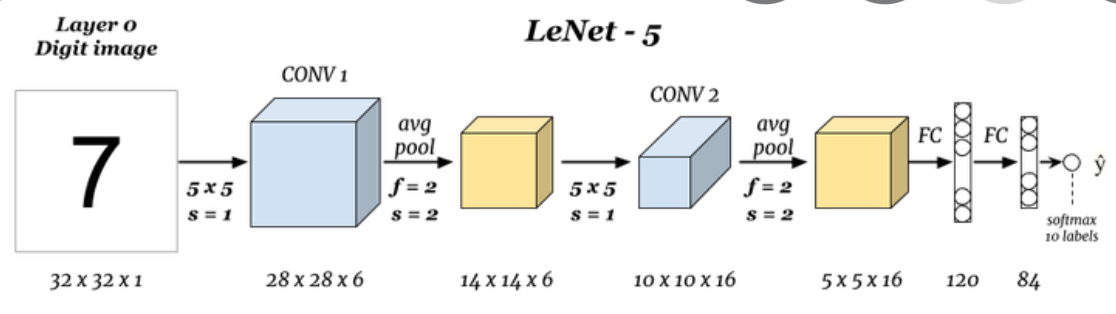

In [30]:
class LeNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.encoder = nn.Sequential(
            nn.Conv2d(in_channels = 1, out_channels = 6, kernel_size = 5),
            nn.ReLU(),
            nn.AvgPool2d(2),
            nn.Conv2d(in_channels = 6, out_channels = 16, kernel_size = 5),
            nn.ReLU(),
            nn.AvgPool2d(2),
            nn.Conv2d(in_channels = 16, out_channels = 120, kernel_size = 5)
        )
        self.head = nn.Sequential(
            nn.Linear(in_features = 120, out_features = 84),
            nn.ReLU(),
            nn.Linear(in_features = 84, out_features = 10),
        )
    def forward(self, x):
        out = self.encoder(x).flatten(start_dim = 1)
        return self.head(out)

In [31]:
model = LeNet()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01, momentum = 0.9)
criterion = nn.CrossEntropyLoss()

In [ ]:
from tqdm.notebook import tqdm
num_epochs = 5
pbar = tqdm(range(1, num_epochs + 1))

for epoch in pbar:
    train_loss, train_accuracy = 0.0, 0.0
    model.train()
    for images, labels in train_loader:
        optimizer.zero_grad()
        predictions = model(images)
        loss = criterion(predictions, labels)
        loss.backward()
        optimizer.step()
        train_loss += loss.item() * images.shape[0]
        train_accuracy += (predictions.argmax(dim = 1) == labels).sum().item()

    test_loss, test_accuracy = 0.0, 0.0
    model.eval()
    for images, labels in test_loader:
        predictions = model(images)
        loss = criterion(predictions, labels)
        test_loss += loss.item() * images.shape[0]
        test_accuracy += (predictions.argmax(dim = 1) == labels).sum().item()
    train_loss /= len(train_loader.dataset)
    test_loss /= len(test_loader.dataset)
    train_accuracy /= len(train_loader.dataset)
    test_accuracy /= len(test_loader.dataset)
    pbar.set_postfix({'train loss': train_loss, 'test loss': test_loss, 'train accuracy' : train_accuracy, 'test accuracy' : test_accuracy})

In [58]:
print('train loss', train_loss)
print('test loss', test_loss)
print('train accuracy',  train_accuracy)
print('test accuracy', test_accuracy)

train loss 0.05124234221205115
test loss 0.04100416041556746
train accuracy 0.9841
test accuracy 0.9864


### Моя реализация

In [11]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
import tests

In [ ]:
tests.test_conv2d()

In [91]:
tests.test_avgPool2d()

test_avgPool2d ... OK


In [14]:
tests.test_Lenet()

test_Lenet ... completed num_test  0
completed num_test  1
completed num_test  2
completed num_test  3
completed num_test  4
OK


In [16]:
from modules.Lenet import Lenet
import modules as mm
model = Lenet()
optimizer = mm.SGD(model, lr = 0.01, momentum = 0.9)
criterion = mm.CrossEntropyLoss()

In [17]:
transform = T.Compose([T.ToTensor(), T.Resize((32,32))])
train_set = MNIST('.MNSIT', transform=transform, train = True, download = True)
test_set = MNIST('.MNSIT', transform=transform, train = False, download = True)

In [18]:
train_loader = DataLoader(train_set, batch_size = 64, shuffle = True)
test_loader = DataLoader(test_set, batch_size = 64, shuffle = False)

In [ ]:
from tqdm.notebook import tqdm
import numpy as np
num_epochs = 1
pbar_epoch = tqdm(range(1, num_epochs + 1))
pbar_train = tqdm(enumerate(train_loader), total=len(train_loader), desc="Train process")

for epoch in pbar_epoch:
    train_loss, train_accuracy = 0.0, 0.0
    model.train()

    for batch_index, data in pbar_train:
        images, labels = data
        images = images.detach().numpy()
        labels = labels.detach().numpy()
        optimizer.zero_grad()
        predictions = model(images)
        loss = criterion(predictions, labels)
        model.backward(images, criterion.backward(predictions, labels))
        optimizer.step()
        cur_accuracy = np.sum(predictions.argmax(axis=1) == labels)
        train_loss += loss * images.shape[0]
        train_accuracy += cur_accuracy
        pbar_train.set_postfix({'train loss': loss, 'train accuracy' : cur_accuracy / images.shape[0]})

    test_loss, test_accuracy = 0.0, 0.0
    model.eval()
    for images, labels in test_loader:
        images = images.detach().numpy()
        labels = labels.detach().numpy()
        predictions = model(images)
        loss = criterion(predictions, labels)
        test_loss += loss.item() * images.shape[0]
        test_accuracy += np.sum(predictions.argmax(axis=1) == labels)
    train_loss /= len(train_loader.dataset)
    test_loss /= len(test_loader.dataset)
    train_accuracy /= len(train_loader.dataset)
    test_accuracy /= len(test_loader.dataset)
    pbar_epoch.set_postfix({'train loss': train_loss, 'test loss': test_loss, 'train accuracy' : train_accuracy, 'test accuracy' : test_accuracy})

In [20]:
print('train loss', train_loss)
print('test loss', test_loss)
print('train accuracy',  train_accuracy)
print('test accuracy', test_accuracy)

train loss 0.4950176176442687
test loss 0.12889776317546112
train accuracy 0.8409333333333333
test accuracy 0.9598
